In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [73]:
wine_load = load_wine()

In [74]:
type(wine_load)

sklearn.utils._bunch.Bunch

In [75]:
wine_load.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [76]:
wine = pd.DataFrame(wine_load['data'], columns=wine_load['feature_names'])

In [77]:
wine_load['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [78]:
wine_load['data'].shape

(178, 13)

In [79]:
wine_load['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [80]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [81]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [82]:
wine['class'] = wine_load['target']

In [83]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [84]:
wine['class'].unique()

array([0, 1, 2])

In [85]:
wine_load.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

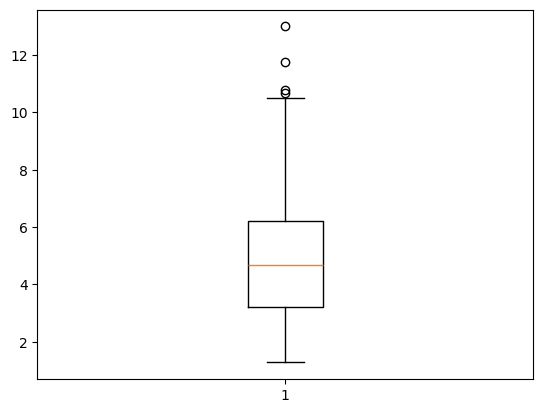

In [86]:
plt.boxplot(wine['color_intensity'])
plt.show()

In [87]:
print(wine['color_intensity'].describe()['25%'])
print(wine['color_intensity'].quantile(0.25))

3.2199999999999998
3.2199999999999998


In [88]:
wine['color_intensity'].quantile(0.25)

np.float64(3.2199999999999998)

In [89]:
q_1, q_3 = np.percentile(wine['color_intensity'], [25, 75])

In [90]:
print('1사분위수는', q_1)
print('3사분위수는', q_3)

1사분위수는 3.2199999999999998
3사분위수는 6.2


In [91]:
iqr = q_3 - q_1
upper_whis = q_3 + 1.5 * iqr
lower_whis = q_1 - 1.5 * iqr

In [92]:
print(iqr)
print(upper_whis)
print(lower_whis)

2.9800000000000004
10.670000000000002
-1.2500000000000009


In [93]:
flag = (wine['color_intensity'] > upper_whis) | (wine['color_intensity'] < lower_whis)

In [94]:
flag.value_counts()

color_intensity
False    174
True       4
Name: count, dtype: int64

In [95]:
ext = wine.loc[flag, ]
ext

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,2
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0,2


In [96]:
type(ext)

pandas.core.frame.DataFrame

In [97]:
ext.index

Index([151, 158, 159, 166], dtype='int64')

In [98]:
len(ext) / len(wine)

0.02247191011235955

In [99]:
def outlier_iqr(_df, *_cols, _num=1.5):
    result = dict()
    for col in _cols:
        q_1, q_3 = np.percentile(_df[col], [25, 75])
        iqr = q_3 - q_1
        upper = q_3 + 1.5*iqr
        lower = q_1 - 1.5*iqr
        flag = (_df[col]>upper) | (_df[col]<lower)
        outlier = _df.loc[flag, ]
        result[col] = outlier
    return result

In [100]:
list(wine.columns[:3, ])

['alcohol', 'malic_acid', 'ash']

In [101]:
outliers = outlier_iqr(wine, *(list(wine.columns[:3, ])))

In [102]:
type(outliers)

dict

In [103]:
type(outliers['alcohol'])

pandas.core.frame.DataFrame

In [104]:
df = wine.copy()

In [105]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [106]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [107]:
df['ash']

0      2.43
1      2.14
2      2.67
3      2.50
4      2.87
       ... 
173    2.45
174    2.48
175    2.26
176    2.37
177    2.74
Name: ash, Length: 178, dtype: float64

In [108]:
df['ash'].describe()

count    178.000000
mean       2.366517
std        0.274344
min        1.360000
25%        2.210000
50%        2.360000
75%        2.557500
max        3.230000
Name: ash, dtype: float64

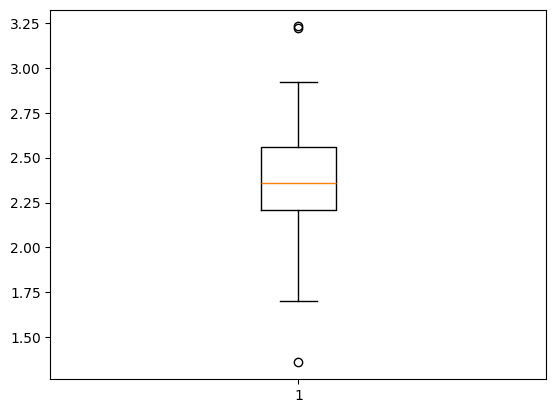

In [109]:
plt.boxplot(df['ash'])
plt.show()

In [110]:
df.drop(outliers['ash'].index, axis=0, inplace=True)

In [111]:
print(len(wine))
print(len(df))

178
175


In [112]:
df['ash'].describe()

count    175.000000
mean       2.362457
std        0.249503
min        1.700000
25%        2.210000
50%        2.360000
75%        2.545000
max        2.920000
Name: ash, dtype: float64

In [113]:
max_value = df['ash'].max()
min_value = df['ash'].min()
center_value = df['ash'].median()
mean_value = df['ash'].mean()
print(max_value, min_value, center_value, mean_value)

2.92 1.7 2.36 2.3624571428571426


In [114]:
df2 = wine.copy()

In [115]:
outliers['ash'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 25 to 121
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       3 non-null      float64
 1   malic_acid                    3 non-null      float64
 2   ash                           3 non-null      float64
 3   alcalinity_of_ash             3 non-null      float64
 4   magnesium                     3 non-null      float64
 5   total_phenols                 3 non-null      float64
 6   flavanoids                    3 non-null      float64
 7   nonflavanoid_phenols          3 non-null      float64
 8   proanthocyanins               3 non-null      float64
 9   color_intensity               3 non-null      float64
 10  hue                           3 non-null      float64
 11  od280/od315_of_diluted_wines  3 non-null      float64
 12  proline                       3 non-null      float64
 13  class      

In [116]:
outliers['ash']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1


In [117]:
outliers['ash']['ash'] > center_value

25      True
59     False
121     True
Name: ash, dtype: bool

In [118]:
flag = outliers['ash']['ash'] > center_value
flag_index = []

for i in flag.index:
    if flag[i]:
        flag_index.append(i)


In [119]:
flag_index

[25, 121]

In [120]:
df2.loc[flag_index, 'ash'] = max_value

In [121]:
df2.loc[flag.index, 'ash']

25     2.92
59     1.36
121    2.92
Name: ash, dtype: float64

In [122]:
df3 = wine.copy()

In [123]:
df3['ash'].describe()

count    178.000000
mean       2.366517
std        0.274344
min        1.360000
25%        2.210000
50%        2.360000
75%        2.557500
max        3.230000
Name: ash, dtype: float64

In [124]:
flag = df3['ash']>max_value
df3.loc[flag, 'ash'] = max_value

In [125]:
flag= df3['ash']<min_value
df3.loc[flag, 'ash'] = min_value

In [126]:
df3['ash'].describe()

count    178.000000
mean       2.365000
std        0.259195
min        1.700000
25%        2.210000
50%        2.360000
75%        2.557500
max        2.920000
Name: ash, dtype: float64

In [127]:
df4 = wine.copy()

flag = outliers['ash']['ash'] > center_value
upper_data = outliers['ash'].loc[flag, 'ash']
lower_data = outliers['ash'].loc[~flag, 'ash']

for i in upper_data:
    df4['ash'].replace(i, max_value, inplace=True)
for i in lower_data:
    df['ash'].replace(i, min_value, inplace=True)

C:\Users\toqha\AppData\Local\Temp\ipykernel_14516\3023810658.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['ash'].replace(i, max_value, inplace=True)
C:\Users\toqha\AppData\Local\Temp\ipykernel_14516\3023810658.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [128]:
df4['ash'].describe()

count    178.000000
mean       2.363090
std        0.265304
min        1.360000
25%        2.210000
50%        2.360000
75%        2.557500
max        2.920000
Name: ash, dtype: float64

## 범주형 변수 처리

In [129]:
wine_load['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [130]:
wine['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [135]:
flag = wine['class'] == 0
wine.loc[flag, 'class'] = 'class_0'

C:\Users\toqha\AppData\Local\Temp\ipykernel_14516\3487616730.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'class_0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  wine.loc[flag, 'class'] = 'class_0'


In [136]:
wine['class'].value_counts()

class
1          71
class_0    59
2          48
Name: count, dtype: int64

In [137]:
wine['class'].map(
    {
        'class_0' : 'class_0',
        1 : 'class_1',
        2 : 'class_2'
	}
)

0      class_0
1      class_0
2      class_0
3      class_0
4      class_0
        ...   
173    class_2
174    class_2
175    class_2
176    class_2
177    class_2
Name: class, Length: 178, dtype: object

In [138]:
wine['class'].value_counts()

class
1          71
class_0    59
2          48
Name: count, dtype: int64

In [139]:
wine['class'] = wine['class'].map(
    lambda x : 'class_1' if x==1 else (
        'class_2' if x==2 else 'class_0'
	)
)

In [140]:
wine['class'].value_counts()

class
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

In [141]:
wine_dummy = pd.get_dummies(
    wine,
    columns=['class']
)

In [142]:
wine_dummy

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class_class_0,class_class_1,class_class_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,True,False,False
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,True,False,False
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,True,False,False
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,True,False,False
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,False,False,True
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,False,False,True
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,False,False,True
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,False,False,True


In [144]:
len(wine_dummy.columns)

16

In [145]:
len(wine.columns)

14